# Prep

First, you will need to import some packages. You will need `pandas` for loading in data, `numpy` for square-rooting your model estimates, `sklearn` for the bulk of the linear regression and modeling work, and `matplotlib` to graph the model's residuals to get a visual representation of accuracy.

In [1]:
# import packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [2]:
# import the data
realestate = pd.read_csv('data/realestate.csv')

# Data Wrangling

In [3]:
# predictive variables
x = realestate[['X2 house age', 
                'X3 distance to the nearest MRT station',
                'X4 number of convenience stores', 
                'X5 latitude', 
                'X6 longitude']]

In [4]:
# target variable (what you are trying to predict)
y = realestate['Y house price of unit area']

In [5]:
# `test_size= .4` because you are using a 60/40 train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [6]:
# to see the shape of the data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248, 5) (248,)
(166, 5) (166,)


In [7]:
# run linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Examine Predictions

In [8]:
# see predictions from model
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

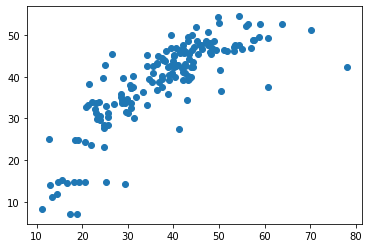

In [9]:
# plot the predictions
plt.scatter(y_test, predictions)

In [10]:
# Accuracy score
print("Score:", lm.score(x_test, y_test))

Score: 0.6442380845121716


##### _This means your model is accurate approximately 64% of the time, which is not too shabby in the real world._

# Mean Absolute Error (MAE)
- the average amount of error between the prediction and the real data. 

In [11]:
metrics.mean_absolute_error(y_test, predictions)

5.550201321415488

##### _Since the lowest you can have is 0, a value of 5.55 is pretty good!_

# Mean Squared Error (MSE)
- the square of the absolute error from above. It's a good one to use because it takes into account large amounts of error, which often happens in the real world.

In [12]:
metrics.mean_squared_error(y_test, predictions)

54.3757285449222

# Root Mean Squared Error (RMSE)
- the square root of the mean squared error you saw above. It is probably the most popular.

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

7.373990001683091

##### _Again, this model fits decently well - 7 is pretty close to zero!_

---

# Prep
First, you will need to import some additional packages in addition to everything you imported last lesson. You will need from `sklearn.model_selection` the packages for `KFold` and for `cross_val_score`.

In [14]:
# import additional packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Goal
With the above data, your goal is to accurately predict housing prices. To ensure this is the most accurate and rigorous model, you will be cross-validating it using the k-folds method.

## Create the Folds

- You will use the `KFold()` function to create your different training and test sets. By inputting the `3`, you have chosen to have 3 iterations, a good number given the small number of cases in your dataset. 
- Then the argument `True` means that you want your data to be shuffled. - Lastly, if you choose to shuffle your data, then you can specify the randomization version - just like with `train_test_split()`. If you were doing this on your own, it wouldn't matter, but since you are following along, and you want your numbers to be the same, specify the `1` as done here so that everyone ends up with the same randomization.

In [15]:
# code slightly modified from lesson - 
# found in DS Student Resources GitHub
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [  0   1   2   3   7   8   9  10  14  15  16  19  20  21  22  24  25  26
  28  30  31  32  33  34  35  36  37  38  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  60  63  64  66  68  70  71  72  74  75
  76  77  79  83  84  86  87  88  94  96  97  99 100 103 104 105 108 109
 110 111 112 113 114 115 116 118 121 123 124 126 128 129 130 131 133 134
 135 136 137 138 140 141 142 143 144 145 147 148 149 150 151 152 153 154
 155 156 157 158 160 163 166 167 168 169 170 174 175 176 177 178 181 182
 183 184 188 190 193 194 195 196 197 198 199 200 201 202 203 205 206 208
 209 210 212 215 216 217 219 220 221 222 224 225 226 227 229 231 234 235
 236 237 239 240 241 243 246 248 249 250 251 252 253 254 255 258 259 260
 262 263 264 265 266 267 269 275 276 277 278 279 280 281 282 283 284 285
 287 288 290 293 296 297 301 302 303 305 306 307 308 309 310 313 315 316
 317 318 319 321 324 326 327 328 331 333 334 335 336 339 340 342 343 344
 345 347 349 352 353 354 355 356 357 358 359

In [16]:
# run cross-validation from sklearn
print(cross_val_score(lm, x,y, cv=3))

[0.62051774 0.50393467 0.55970703]
